In [ ]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [ ]:
class Node:
    """
        parent is parent of the current Node
        position is current position of the Node in the maze
        g is cost from start to current Node
        h is heuristic based estimated cost for current Node to end Node
        f is total cost of present node i.e. :  f = g + h
    """

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position
        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position

    def euclidean(self, end_node):
        dist = (((self.position[0] - end_node.position[0]) ** 2) + 
                ((self.position[1] - end_node.position[1]) ** 2))
        return dist

    def manhattan(self, end_node):
        dist = (abs(self.position[0] - end_node.position[0])  + 
                abs(self.position[1] - end_node.position[1]))
        return dist

def return_path(current_node,maze):
    path = []
    no_rows, no_columns = np.shape(maze)
    result = [[-1 for i in range(no_columns)] for j in range(no_rows)]
    current = current_node
    while current is not None:
        path.append(current.position)
        current = current.parent
    path = path[::-1]
    start_value = 0
    for i in range(len(path)):
        result[path[i][0]][path[i][1]] = start_value
        start_value += 1
    return result

def A_star(maze, start, end, move, heuristic='euclidean'):
    start_node = Node(None, tuple(start))
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, tuple(end))
    end_node.g = end_node.h = end_node.f = 0
    yet_to_visit_list = []  
    visited_list = [] 
    yet_to_visit_list.append(start_node)
    outer_iterations = 0
    max_iterations = (len(maze) // 2) ** 10

    """
        1) We first get the current node by comparing all f cost and selecting the lowest cost node for further expansion
        2) Check max iteration reached or not. Set a message and stop execution
        3) Remove the selected node from yet_to_visit list and add this node to visited list
        4) Perform Goal test and return the path else perform below steps
        5) For selected node find out all children (use move to find children)
            a) if move is diagonal, then cost = sqrt(2), else cost = 1
            b) get the current postion for the selected node (this becomes parent node for the children)
            c) check if a valid position exist (boundary will make few nodes invalid)
            d) if any node is a wall then ignore that (obstacle)
            e) add to valid children node list for the selected parent
            
            For all the children node
                a) if child in visited list then ignore it and try next neighbour node
                b) calculate child node g, h and f values
                c) if child in yet_to_visit list then ignore it
                d) else move the child to yet_to_visit list
    """
    no_rows, no_columns = np.shape(maze)
    while len(yet_to_visit_list) > 0:
        outer_iterations += 1    
        current_node = yet_to_visit_list[0]
        current_index = 0
        for index, item in enumerate(yet_to_visit_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index
        if outer_iterations > max_iterations:
            print ("giving up on pathfinding too many iterations")
            return return_path(current_node,maze)
        yet_to_visit_list.pop(current_index)
        visited_list.append(current_node)
        if current_node == end_node:
            return return_path(current_node,maze)
        children = []
        for new_position in move:
            if 0 in new_position:
                cost = 1
            else:
                cost = np.sqrt(2) 
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])
            if (node_position[0] > (no_rows - 1) or 
                node_position[0] < 0 or 
                node_position[1] > (no_columns -1) or 
                node_position[1] < 0):
                continue
            if maze[node_position[0]][node_position[1]] != 0:
                continue
            new_node = Node(current_node, node_position)
            children.append(new_node)

        for child in children:
            if len([visited_child for visited_child in visited_list if visited_child == child]) > 0:
                continue
            child.g = current_node.g + cost
            if heuristic=='manhattan':
                child.h = child.manhattan(end_node)
            elif heuristic=='euclidean':
                child.h = child.euclidean(end_node)
            else:
                child.h = 0
            child.f = child.g + child.h
            if len([i for i in yet_to_visit_list if child == i and child.g > i.g]) > 0:
                continue
            yet_to_visit_list.append(child)

In [ ]:
def plot_path(maze, start, end, path):
    if path is None:
        print("No solution found") 
    m,n = len(maze), len(maze[0])
    pt = [[0 for j in range(n)] for i in range(m)]
    for i in range(m):
        for j in range(n):
            if path[i][j]!=-1:
                if [i,j]==start:
                    pt[i][j] = 1
                elif [i,j]==end:
                    pt[i][j] = 3
                else:
                    pt[i][j] = 2
            if maze[i][j]==1:
                pt[i][j] = 4
    plt.pcolormesh(pt)
    plt.axes().set_aspect('equal') 
    plt.xticks([]) 
    plt.yticks([]) 
    plt.axes().invert_yaxis() 
    plt.show()

def plot_maze(maze, start, end):
    m,n = len(maze), len(maze[0])
    pt = [[0 for j in range(n)] for i in range(m)]
    for i in range(m):
        for j in range(n):
            if [i,j]==start:
                pt[i][j] = 1
            elif [i,j]==end:
                pt[i][j] = 3
            elif maze[i][j]==1:
                pt[i][j] = 4
    plt.pcolormesh(pt)
    plt.axes().set_aspect('equal') 
    plt.xticks([]) 
    plt.yticks([]) 
    plt.axes().invert_yaxis() 
    plt.show()

In [ ]:
maze = [[0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 0],
        [0, 1, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0]]    
start = [0, 0]
end = [3,2] 

In [ ]:
'''
Generating all the 8 successor of this cell

    N.W   N   N.E
      \   |   /
       \  |  /
    W----Cell----E
       /  |  \
      /   |   \
    S.W   S   S.E

N -->  North       (-1, 0)
S -->  South       (1, 0)
E -->  East        (0, 1)
W -->  West        (0, -1)
N.E--> North-East  (-1, 1)
N.W--> North-West  (-1, -1)
S.E--> South-East  (1, 1)
S.W--> South-West  (1, -1)
'''
move  =  [[-1, 0 ],
          [ 1, 0 ], 
          [ 0, 1 ],
          [ 0, -1],
          [-1, 1],
          [-1, -1],
          [1, 1],
          [1, -1]]

path = A_star(maze, start, end, move, heuristic='manhattan')

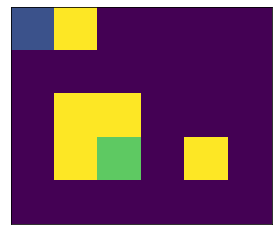

In [ ]:
plot_maze(maze, start, end)

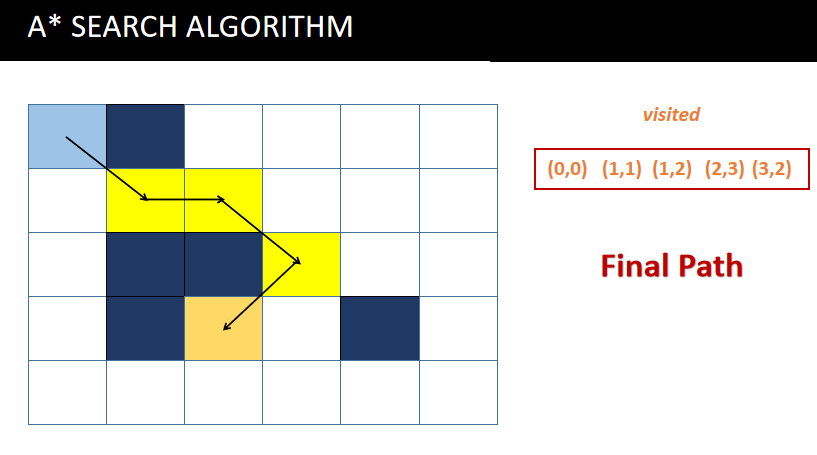

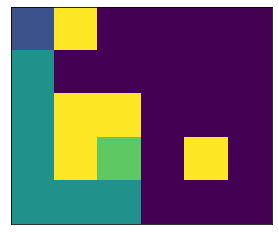

In [ ]:
plot_path(maze, start, end, path)